In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
# import statsmodels.api as sm
# import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
# import statsmodels.api as sm
import scipy.stats as stats
# import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [2]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
null_counts = houses_df.isnull().sum()
# print(null_counts)
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


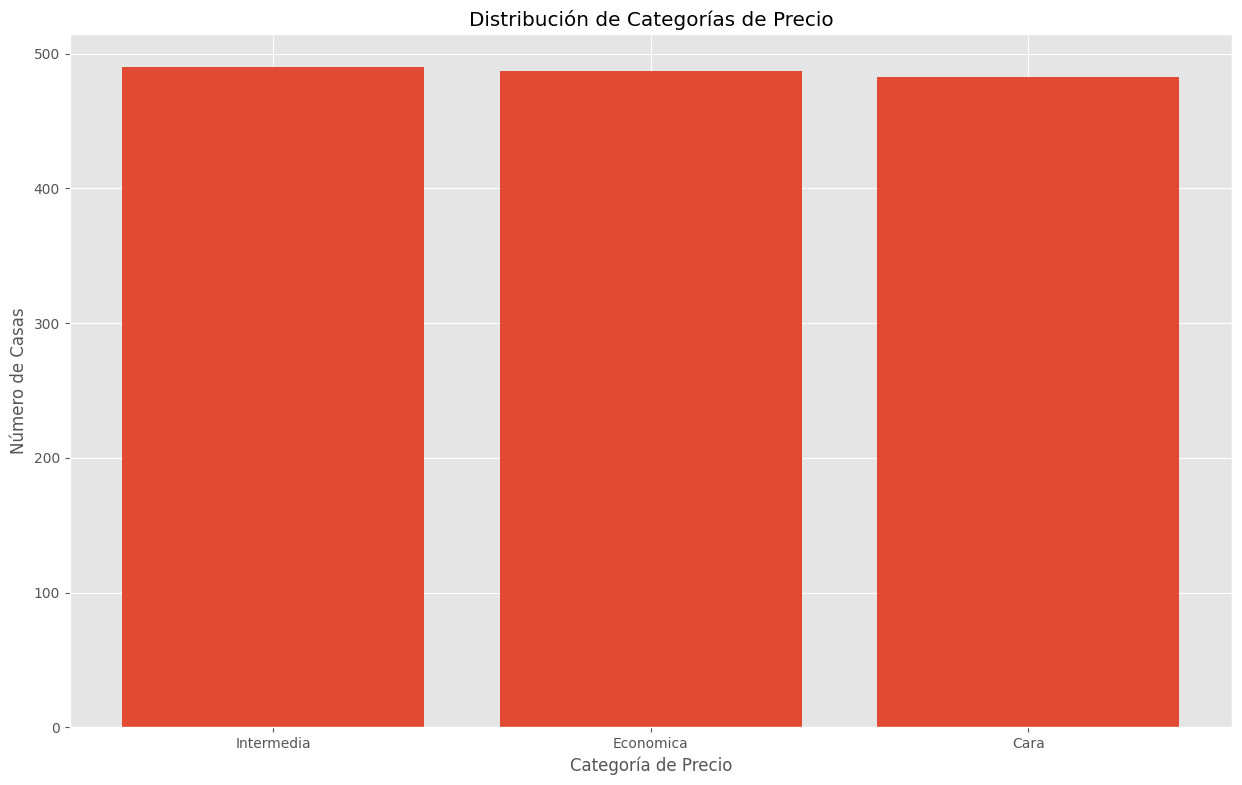

In [4]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()